In [50]:
import random
import numpy as np
import pandas as pd
import sklearn
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation

In [51]:
SEED = 2018
random.seed(SEED)
np.random.seed(SEED)

In [52]:
import os, sys, stat 
from androguard.core.bytecodes.apk import APK
malign = 'E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/malware'
benign = 'E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/no malware'
permissions =  []
countM = 0
countB = 0

for entry in os.scandir(benign):
  if entry.path.endswith(".apk") and entry.is_file():
          try:
            a = APK(entry.path)
            perm = a.get_permissions()
            countB += 1
            for per in perm:
              if per not in permissions and per.startswith('android.permission'):
                permissions.append(per)
          except:
            # os.remove(entry.path)   
            pass
for entry in os.scandir(malign):
  if entry.path.endswith(".apk") and entry.is_file():
          try:
            a = APK(entry.path)
            perm = a.get_permissions()
            countM += 1
            for per in perm:
              if per not in permissions and per.startswith('android.permission'):
                permissions.append(per)
          except:
            # os.remove(entry.path) 
            pass
  

Requested API level 33 is larger than maximum we have, returning API level 28 instead.
Requested API level 30 is larger than maximum we have, returning API level 28 instead.
Requested API level 32 is larger than maximum we have, returning API level 28 instead.
Requested API level 29 is larger than maximum we have, returning API level 28 instead.
Requested API level 31 is larger than maximum we have, returning API level 28 instead.
Requested API level 30 is larger than maximum we have, returning API level 28 instead.
Requested API level 29 is larger than maximum we have, returning API level 28 instead.
Requested API level 30 is larger than maximum we have, returning API level 28 instead.
Requested API level 30 is larger than maximum we have, returning API level 28 instead.
Requested API level 32 is larger than maximum we have, returning API level 28 instead.
Requested API level 30 is larger than maximum we have, returning API level 28 instead.
Requested API level 30 is larger than maxim

In [53]:
import pandas as pd
import os
dataset_df = pd.DataFrame(columns=permissions)
dataset_b = {}
id = 0
for entry in os.scandir(benign):
  if entry.path.endswith(".apk") and entry.is_file():
    a = APK(entry.path)
    perm = a.get_permissions()
    id += 1
    for d in permissions:
      if d in perm:
        dataset_b[d]=1
      else:
        dataset_b[d]=0
    dataset_b['class'] = 'benign'
    dataset_df=dataset_df.append(dataset_b, ignore_index=True)
dataset_m = {}
for entry in os.scandir(malign):
  if entry.path.endswith(".apk") and entry.is_file():
    a = APK(entry.path)
    perm = a.get_permissions()
    id += 1
    for d in permissions:
      if d in perm:
        dataset_m[d]=1
      else:
        dataset_m[d]=0
    dataset_m['class'] = 'malign'
    dataset_df=dataset_df.append(dataset_m, ignore_index=True)

C:\Users\OS\AppData\Local\Temp\ipykernel_5040\650095370.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_df=dataset_df.append(dataset_b, ignore_index=True)
Requested API level 33 is larger than maximum we have, returning API level 28 instead.
C:\Users\OS\AppData\Local\Temp\ipykernel_5040\650095370.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_df=dataset_df.append(dataset_b, ignore_index=True)
C:\Users\OS\AppData\Local\Temp\ipykernel_5040\650095370.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_df=dataset_df.append(dataset_b, ignore_index=True)
C:\Users\OS\AppData\Local\Temp\ipykernel_5040\650095370.py:17: FutureWarning: The frame.append method is deprecated and will be removed from p

In [54]:
dataset = pd.read_csv('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/test.csv')
Y = dataset['class']
X = dataset.drop(['class'], axis=1)
features = X.columns

In [55]:
encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)
np.array(X)

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
est = SVC()
score = -1.0 * cross_val_score(est, X, Y, cv=5, scoring="neg_mean_squared_error")
print("CV MSE before feature selection: {:.2f}".format(np.mean(score)))

CV MSE before feature selection: 0.09


In [57]:
class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            raise ValueError("The population size is not stable.")  
            
    def initilize(self):
        population = []
        for i in range(self.size):
            chromosome = np.ones(self.n_features, dtype=np.bool)
            mask = np.random.rand(len(chromosome)) < 0.3
            chromosome[mask] = False
            population.append(chromosome)
        return population
    def fitness(self, population):
        X, y = self.dataset
        scores = []
        for chromosome in population:
            score = -1.0 * np.mean(cross_val_score(self.estimator, X[:,chromosome], y, 
                                                       cv=5, 
                                                       scoring="neg_mean_squared_error"))
            scores.append(score)
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds]), list(population[inds,:])

    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i])
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted))
        random.shuffle(population_next)
        return population_next

    def crossover(self, population):
        population_next = []
        for i in range(int(len(population)/2)):
            for j in range(self.n_children):
                chromosome1, chromosome2 = population[i], population[len(population)-1-i]
                child = chromosome1
                mask = np.random.rand(len(child)) > 0.5
                child[mask] = chromosome2[mask]
                population_next.append(child)
        return population_next
	
    def mutate(self, population):
        population_next = []
        for i in range(len(population)):
            chromosome = population[i]
            if random.random() < self.mutation_rate:
                mask = np.random.rand(len(chromosome)) < 0.05
                chromosome[mask] = False
            population_next.append(chromosome)
        return population_next
    def generate(self, population):
        # Selection, crossover and mutation
        scores_sorted, population_sorted = self.fitness(population)
        population = self.select(population_sorted)
        population = self.crossover(population)
        population = self.mutate(population)
        # History
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
        
        return population

    def fit(self, X, y):
 
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        g = 1
        population = self.initilize()
        for i in range(self.n_gen):
            population = self.generate(population)
            print('generation:', g)
            g+=1
        return self 
    
    @property
    def support_(self):
        return self.chromosomes_best[-1]

    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend()
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

C:\Users\OS\AppData\Local\Temp\ipykernel_5040\792065656.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chromosome = np.ones(self.n_features, dtype=np.bool)


generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7


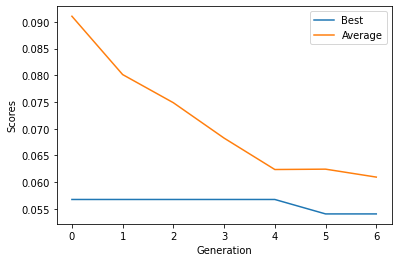

In [58]:
X = X.values
sel = GeneticSelector(estimator=SVC(), 
                      n_gen=7, size=200, n_best=40, n_rand=40, 
                      n_children=5, mutation_rate=0.05)
sel.fit(X, Y)
sel.plot_scores()

In [59]:
score = -1.0 * cross_val_score(est, X[:,sel.support_], Y, cv=5, scoring="neg_mean_squared_error")
print("CV MSE after feature selection: {:.2f}".format(np.mean(score)))

CV MSE after feature selection: 0.05


In [60]:
import pickle
pickle.dump(sel, open('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/ga.pkl', 'wb'))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [74]:
AN = Sequential()
AN.add(Dense(256, input_dim = 109, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(128, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(128, activation='relu'))
AN.add(Dropout(0.3))
AN.add(Dense(32, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(1, activation='sigmoid'))
AN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

AN.fit(X_train[:,sel.support_], y_train, epochs=175, batch_size=32)

scores = AN.evaluate(X_test[:,sel.support_], y_test)
for i in range(len(scores)):
  print("\n%s: %.2f%%" % (AN.metrics_names[i], scores[i]*100))

Epoch 1/175


ValueError: in user code:

    File "c:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 109), found shape=(None, 114)


In [ ]:
from androguard.core.bytecodes.apk import APK

def predict(apk):
  vector = {}
  a = APK(apk)
  perm = a.get_permissions()
  print(perm)
  for d in features:
    if d in perm:
      vector[d]=1
    else:
      vector[d]=0
  data = [ v for v in vector.values() ]
  data = np.array(data)
  # print(data[sel.support_])
  print(AN.predict([[data[sel.support_]]]))

# predict('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/no malware/1.apk')

In [ ]:
pickle.dump(AN, open('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/ANN_GA.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://743c3537-aeca-4a4d-87f9-7d4a90fb482b/assets


In [ ]:
# model SVC
Y = dataset['class']
X = dataset.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','sigmoid', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(X_train.loc[:, sel.support_], y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.763 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.617 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.627 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.627 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.627 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.610 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=3)

In [ ]:
print(grid.best_params_) 
grid_predictions = grid.predict(X_test.loc[:,sel.support_]) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 
pickle.dump(grid, open('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/svc_ga.pkl', 'wb'))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

      benign       1.00      0.88      0.94        26
      malign       0.94      1.00      0.97        48

    accuracy                           0.96        74
   macro avg       0.97      0.94      0.95        74
weighted avg       0.96      0.96      0.96        74



In [73]:
def predict(apk):
  vector = {}
  a = APK(apk)
  perm = a.get_permissions()
  print(perm)
  for d in features:
    if d in perm:
      vector[d]=1
    else:
      vector[d]=0
  data = [ v for v in vector.values() ]
  data = np.array(data)
  print(grid.predict([data[sel.support_]]))
  
predict('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/malware/1.apk')
predict('E:/TaiLieuHoc_2022-2023/PBL6/PBL_APK/no malware/1.apk')


['android.permission.READ_CONTACTS', 'android.permission.WRITE_SETTINGS', 'android.permission.CAMERA', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.VIBRATE', 'android.permission.WAKE_LOCK', 'android.permission.READ_PHONE_STATE', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.GET_TASKS', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.GET_ACCOUNTS', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.INTERNET']


NameError: name 'grid' is not defined